# **Incremental Capstone 2** #

In [525]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import sys

# How to tell python version
#print (sys.version_info)
#print (platform.python_version())

# How to pip install from Terminal window:
# python -m pip install seaborn


### <u>**Data Import and Basic Info**</u>

In [526]:
# Import data into DataFrame
# Renamed CSV file is assumed to live in same folder as my notebook
df_NSME1988 = pd.read_csv("NSMES1988new.csv")

# Make a copy of the dataframe to contain the modifications completed in this workbook
df_NSME1988_new = df_NSME1988.copy(deep=True)

# Let's look at what we just imported and get some more info
# I like to delineate output to make it more readable
print("***********************************")
print("Basic Info of imported data set")
print("***********************************")
print()

# Print df Column Info
df_NSME1988.info()
print()
print()

# Print Stats
print("Description - Stats")
print()
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_NSME1988.describe(include='all').T)



***********************************
Basic Info of imported data set
***********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      4406 non-null   int64 
 1   id                              4406 non-null   int64 
 2   physician_office_visits         4406 non-null   int64 
 3   nonphysician_office_visits      4406 non-null   int64 
 4   physician_outpatient_visits     4406 non-null   int64 
 5   nonphysician_outpatient_visits  4406 non-null   int64 
 6   emergency_room_visits           4406 non-null   int64 
 7   number_of_hospital_stays        4406 non-null   int64 
 8   overall_health_factor           4406 non-null   object
 9   number_of_chronic_conditions    4406 non-null   int64 
 10  daily_living_activities         4406 non-null   object
 11  reg

### <u>**Clean up DataTypes to be most efficient memory/performance usage**</u>

**#1)** In the previous Capstone (#1) - I identified that I wanted to change the yes/no columns to be of type bool  
        This **imported modified new csv** data set already contains those conversions  
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**is_married, is_employed, has_health_insurance, has_medicaid**  
        This **imported modified new csv** data set already contains these conversions  
  
**#2)** In the previous Capstone (#1) - I identified that it didn't particularly make sense to have **family_income** as a float64 type.  
        It makes sense to change it to an **int32** with a max value of: 2,147,483,647  
        This **imported modified new csv** data set already contains this conversion  

**#3)** The following **int64** types can be converted to **int16**. (After some thought I thought we might encounter some larger numbers - max 32,767).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**physician_office_visits, nonphysician_office_visits, physician_outpatient_visits,**  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, number_of_chronic_conditions**

**#4)** The following **int64** types can be converted to **int8**. (After some thought I thought we might encounter some larger numbers).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**years_of_education, age**

#### <u>**Drop Columns that aren't useful** </u> ####
The id and unnamed columns will hold new value as we analyze/plot column values so drop them

In [527]:
df_NSME1988_new.drop('id', axis=1, inplace=True)
df_NSME1988_new.drop('Unnamed: 0', axis=1, inplace=True)

#### <u>**Data Type Conversions** </u> ####

In [528]:
# Int64 to Int16 conversions
columns = ['physician_office_visits', 'nonphysician_office_visits', 'physician_outpatient_visits',
            'nonphysician_outpatient_visits', 'emergency_room_visits', 'number_of_hospital_stays', 
            'number_of_chronic_conditions']
df_NSME1988_new[columns] = df_NSME1988_new[columns].astype('int16')

# Int64 to Int8 conversions
columns = ['years_of_education', 'age']
df_NSME1988_new[columns] = df_NSME1988_new[columns].astype('int8')

print()
print("Dataframe with modified data types:")
df_NSME1988_new.info()
print()
print()


Dataframe with modified data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   physician_office_visits         4406 non-null   int16 
 1   nonphysician_office_visits      4406 non-null   int16 
 2   physician_outpatient_visits     4406 non-null   int16 
 3   nonphysician_outpatient_visits  4406 non-null   int16 
 4   emergency_room_visits           4406 non-null   int16 
 5   number_of_hospital_stays        4406 non-null   int16 
 6   overall_health_factor           4406 non-null   object
 7   number_of_chronic_conditions    4406 non-null   int16 
 8   daily_living_activities         4406 non-null   object
 9   region                          4406 non-null   object
 10  age                             4406 non-null   int8  
 11  gender                          4406 non-null   object
 12  is_married 

### <u>**Transform Data To More Meaningful Values**</u>

 At first glance its seems kinda of weird and less than intuitive the **age** and **income**
 are not true values, but rather a factor of some multiplier

**This is the code I used to transform those columns to "normalized-ish" integer values in the previous Capstone (#1)**  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;df_cleaned_up_data["age"] = (df_cleaned_up_data["age"] * 10).round().astype(np.int8)  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;df_cleaned_up_data["family_income"] = (df_cleaned_up_data["family_income"] * 10000).round().astype(np.int32)  
  
This **imported modified new csv** data set already contains these conversions

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and get the following stats:  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;min, max, mean, median, average and variance

In [529]:
# Iterate over numeric columns
print("Min, Max, Mean, Median and Variance of numeric columns in dataset")
print()
for col_name, col_data in df_NSME1988_new.select_dtypes(include=['number']).items():
    print(f"{col_name:40s} min:{col_data.min():>10}, max:{col_data.max():>10}, mean:{col_data.mean():>10.4f}, median:{col_data.median():>10.4f},  variance:{col_data.var():>10.4f}")
    
print()
print()

Min, Max, Mean, Median and Variance of numeric columns in dataset

physician_office_visits                  min:         0, max:        89, mean:    5.7744, median:    4.0000,  variance:   45.6871
nonphysician_office_visits               min:         0, max:       104, mean:    1.6180, median:    0.0000,  variance:   28.2711
physician_outpatient_visits              min:      -115, max:        71, mean:    0.6927, median:    0.0000,  variance:   11.9155
nonphysician_outpatient_visits           min:      -101, max:       113, mean:    0.4780, median:    0.0000,  variance:   11.9713
emergency_room_visits                    min:         0, max:        12, mean:    0.2635, median:    0.0000,  variance:    0.4951
number_of_hospital_stays                 min:         0, max:         8, mean:    0.2960, median:    0.0000,  variance:    0.5571
number_of_chronic_conditions             min:         0, max:         8, mean:    1.5420, median:    1.0000,  variance:    1.8215
age                    

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and plot histograms for the column data.  
I want to see what the distributions for each of the features looks like (skew left, skew right, normal..)
  
In working with no-code KNIME and RapidMiner (AI Studio), I liked the ability to see analysis of imported data  
A nice feature is the histograms they provided.

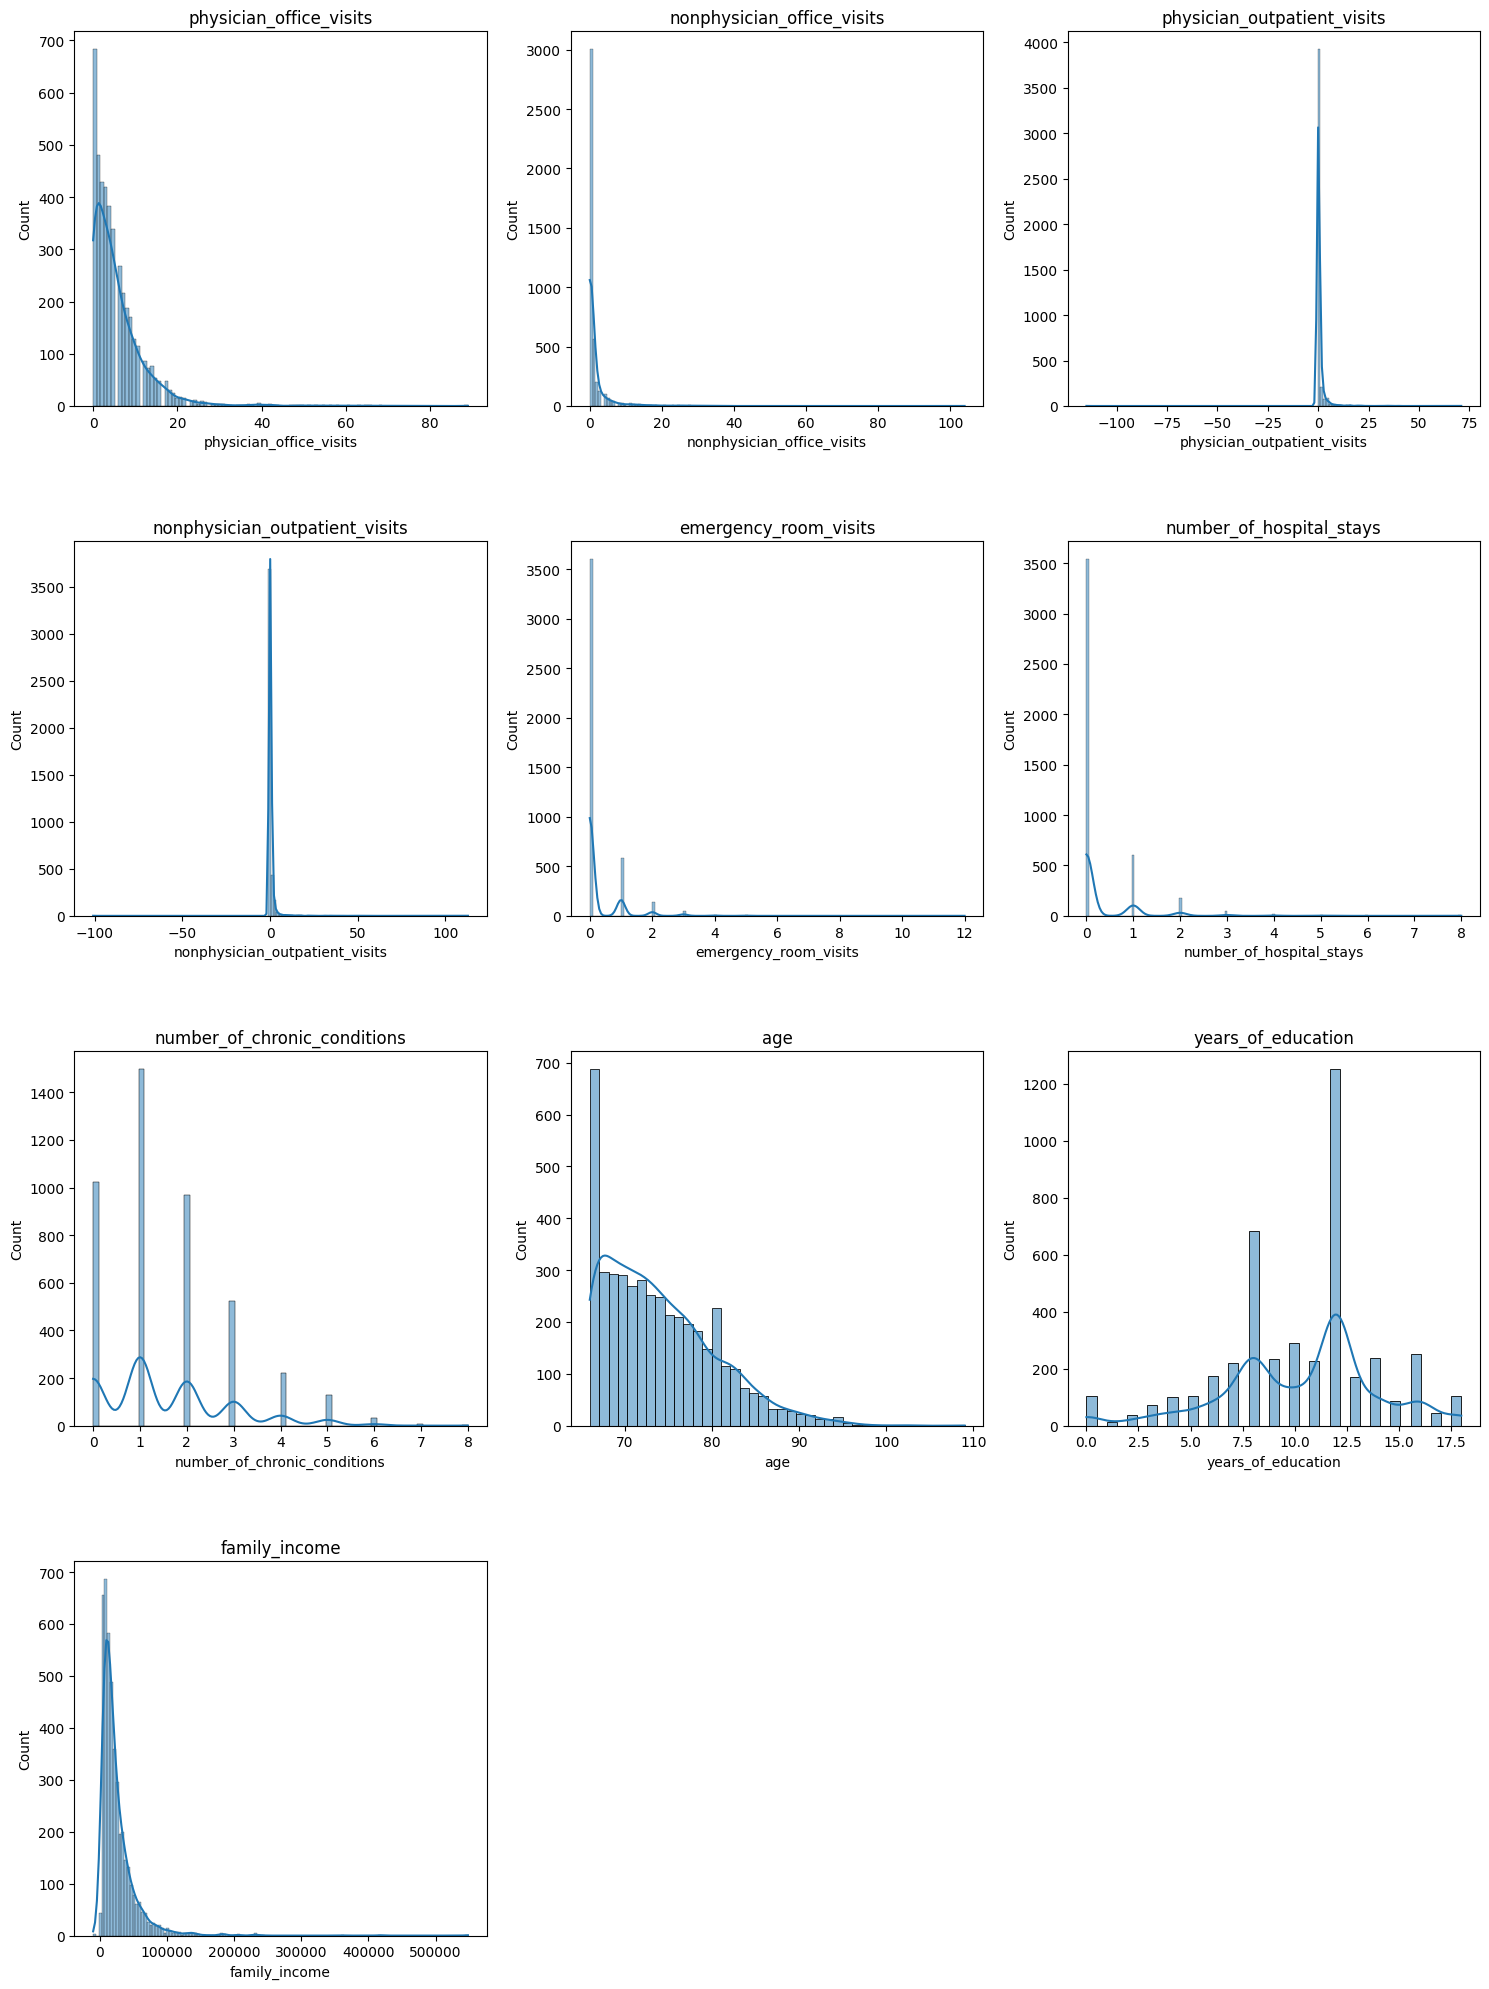

In [530]:
# Figure out the numeric columns
numeric_cols = df_NSME1988_new.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)

# I need a 3X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_NSME1988_new, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide the blank/empty graphs
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    



### <u>**Some basic data analysis on non numerical columns**</u>
  
For starters, lets iterate over all the non numeric columns and plot histograms for the column data.  
I want to see what the distributions for each of the features looks like (skew left, skew right, normal..)


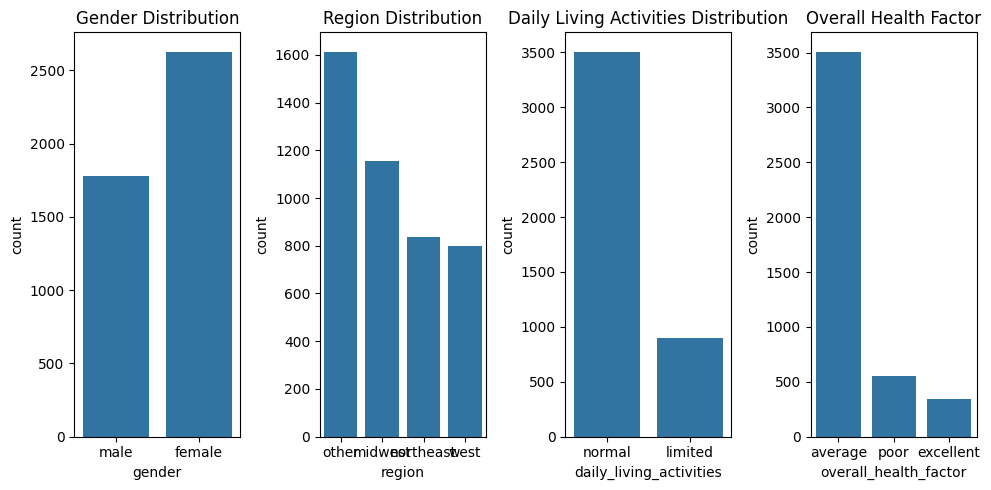

In [531]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Gender counts
sns.countplot(data=df_NSME1988_new, x='gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Region counts
sns.countplot(data=df_NSME1988_new, x='region', ax=axes[1])
axes[1].set_title('Region Distribution')

# Daily living activities counts
sns.countplot(data=df_NSME1988_new, x='daily_living_activities', ax=axes[2])
axes[2].set_title('Daily Living Activities Distribution')

# Overall Health Factor
sns.countplot(data=df_NSME1988_new, x='overall_health_factor', ax=axes[3])
axes[3].set_title('Overall Health Factor')

plt.tight_layout()
plt.show()

### <u>**Analysing the Non-Numeric distributions**</u> ###

We can infer some information based on the above plots.  
1) More women  
2) Other region seems to be most popular in the data  - right skewed, biased by "other"
3) Most people have normal daily activities  
4) Most people same to have average health. Overall Health is right skewed

### <u>**Looking at some interesting comparisons**</u> ###

It would be interesting to plot overall_health_factor, daily_living_activities, region, gender the numeric values  
It would also be worth taking a look at relationships between health factor and region, gender and activities
 

### <u>**Some Analysis of the Distributions**</u>

physician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew           
nonphysician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew       
physician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Left Skew -- perhaps Normal  
nonphysician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Normal    
emergency_room_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_hospital_stays:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_chronic_conditions:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew         
age:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew       
years_of_education&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Left Skew - Perhaps Normal  
family_income&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew

### <u>**Export Results back to CSV and JSON files**</u>


In [532]:
# Print df Column Info
df_NSME1988_new.info()
print()
print()

# Print Stats
print("Description - Stats")
print()
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_NSME1988_new.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   physician_office_visits         4406 non-null   int16 
 1   nonphysician_office_visits      4406 non-null   int16 
 2   physician_outpatient_visits     4406 non-null   int16 
 3   nonphysician_outpatient_visits  4406 non-null   int16 
 4   emergency_room_visits           4406 non-null   int16 
 5   number_of_hospital_stays        4406 non-null   int16 
 6   overall_health_factor           4406 non-null   object
 7   number_of_chronic_conditions    4406 non-null   int16 
 8   daily_living_activities         4406 non-null   object
 9   region                          4406 non-null   object
 10  age                             4406 non-null   int8  
 11  gender                          4406 non-null   object
 12  is_married                      4406 non-null   

#### **Export Results back to CSV and JSON files** ####

In [533]:
# Export the Cleaned up/ Translated Data to a Json and CSV files
print("Exported the Cleaned up/ Translated Data to a Json file")
df_NSME1988_new.to_json('NSMES1988New-Capstone-2.json', orient='records', indent=4)
print()

print("Exported the Cleaned up/ Translated Data to a CSV file")
df_NSME1988_new.to_csv('NSMES1988New-Capstone-2.csv')
print()

Exported the Cleaned up/ Translated Data to a Json file

Exported the Cleaned up/ Translated Data to a CSV file



In [ ]:
sns.boxplot(data=df_NSME1988_new, x='overall_health_factor', y='age')
plt.title('Age Distribution by Overall Health Factor')
plt.show()

NameError: name 'df' is not defined

### **Capstone Session 2 Findings**

Intially I needed to do some data cleaning to be able to do some plots.  
I was able to do some histograms to look at the distributions of the features.  
I now have a basic understanding of most of the features - the plotting is visually useful.  
Other than "Other" in regions, I don't see any data values (ranges) that seem oddball or that could skew analysis.  

I am looking forward to doing some further analysis to compare the features and feature combinations against overall health.


